In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
from pytrends.request import TrendReq
from pprint import pprint
import string

# Import API key
from config import nyt_api_key
from config import gkey

## Generate Top Query List

In [20]:
type_list = [#"Arts", 
             #"Automobiles", 
             #"Blogs", 
             #"Books", 
             "Business Day", 
             #"Education", 
             #"Fashion & Style", 
             #"Food", 
             #"Health", 
             #"Job Market", 
             #"Magazine", 
             #"membercenter", 
             #"Movies", 
             "Multimedia", 
             "N.Y.%20%2F%20Region", 
             "NYT Now",  
             #"Open", 
             #"Opinion", 
             #"Public Editor", 
             #"Real Estate", 
             #"Science", 
             #"Sports", 
             #"Style", 
             "Sunday Review", 
             #"T Magazine", 
             #"Technology", 
             #"The Upshot", 
             #"Theater", 
             #"Times Insider", 
             "Today’s Paper", 
             #"Travel", 
             "U.S.", 
             "World", 
             #"Your Money"
]

# Initialize empty list to hold description facets
facets = []

# Loop through each type
for type in type_list:
    # Starting URL for NYT Most Shared API Call - Facebook
    url = f"http://api.nytimes.com/svc/mostpopular/v2/mostshared/{type}/facebook/30.json?"
    query_url = f"{url}api-key={nyt_api_key}"
    response = requests.get(query_url).json()

    # Loop through the list of articles, remove common punctuation, and perform a split
    for result in range(len(response['results'])):
        text = response['results'][result]['org_facet']
        for facet in text:
            facets.append(facet.lower())
            #print(facets)



In [21]:
# Create DataFrame with the top 5 (by value count) queries
facet_df=pd.DataFrame(facets).rename(columns={0:"Number of Appearances"})
top_queries = pd.DataFrame(facet_df['Number of Appearances'].value_counts()).head(20)
top_queries_reset = top_queries.reset_index()
top_queries_rnm = top_queries_reset.rename(columns={"index":"Facet"})
top_queries_rnm

,Facet,Number of Appearances
0,islamic state in iraq and syria (isis),3
1,justice department,3
2,frauds and swindling,2
3,democratic party,2
4,roman catholic church,2
5,presidential election of 2016,2
6,suits and litigation (civil),2
7,education department (us),2
8,sex crimes,2
9,espionage and intelligence services,2


In [34]:
# Construct keyword list for Google Trends
query_list = top_queries_rnm["Facet"].head()
kw_list = ["fraud"]
# Configure Google Trends

pytrends = TrendReq(hl='en-US', tz=360)
# Add the keyword list in 
pytrends.build_payload(kw_list, cat=0, timeframe='2017-09-07 2018-09-07', geo='US',gprop='')
    
data_list = pytrends.interest_by_region(resolution='STATE')

data_list1 = data_list.loc[(data_list!=0).any(1)]
data_list1 = data_list1.reset_index()
data_list1['lat'] = ''
data_list1['lng'] = ''
data_list1

,geoName,fraud,lat,lng
0,Alabama,51,,
1,Alaska,49,,
2,Arizona,53,,
3,Arkansas,43,,
4,California,62,,
5,Colorado,51,,
6,Connecticut,51,,
7,Delaware,58,,
8,District of Columbia,100,,
9,Florida,63,,


In [35]:
lat = []
lng = []
for city in data_list1['geoName']:
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(city, gkey)
    geo_data = requests.get(target_url).json()
    lati = geo_data['results'][0]['geometry']['location']['lat']
    lngi = geo_data['results'][0]['geometry']['location']['lng']
    lat.append(lati)
    lng.append(lngi)

In [36]:
data_list1['lat'] = lat
data_list1['lng'] = lng
data_list1.head()

,geoName,fraud,lat,lng
0,Alabama,51,32.318231,-86.902298
1,Alaska,49,64.200841,-149.493673
2,Arizona,53,34.048928,-111.093731
3,Arkansas,43,35.201050,-91.831833
4,California,62,36.778261,-119.417932


In [37]:
locations = data_list1[['lat','lng']].astype(float)
query_request = data_list1['fraud'].astype(float)

In [38]:
gmaps.configure(api_key = gkey)

In [39]:
# Construct heat map for the query_request
fig = gmaps.figure(map_type="HYBRID")
heat_layer = gmaps.heatmap_layer(locations, weights=query_request,
                                dissipating=False, max_intensity=100, point_radius = 1)
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [40]:
pytrends.related_queries()

{'fraud': {'top':                     query  value
  0            credit fraud    100
  1            report fraud     94
  2              bank fraud     80
  3             fraud alert     61
  4               tax fraud     60
  5           what is fraud     54
  6       credit card fraud     51
  7         insurance fraud     50
  8               irs fraud     29
  9             chase fraud     29
  10            check fraud     28
  11    how to report fraud     28
  12       fraud protection     25
  13            voter fraud     24
  14       bankruptcy fraud     23
  15       fraud definition     23
  16                equifax     21
  17       fraud prevention     20
  18         identity fraud     20
  19      wells fargo fraud     19
  20  bank of america fraud     19
  21     credit fraud alert     18
  22         medicare fraud     17
  23    fraud alert equifax     17
  24               experian     17,
  'rising':                            query  value
  0        yoshi comm

In [41]:
# Construct bar graph for the related queries
related_query = pytrends.related_queries()
related_query_df = related_query['fraud']['rising'].head(20)
related_query_df

,query,value
0,yoshi commits tax fraud,13000
1,equifax data breach,8700
2,nirav modi fraud,7550
3,pnb fraud,6800
4,roberi and fraud,4750
5,genuine fraud e lockhart,4300
6,equifax breach,3400
7,yoshi tax fraud,3150
8,punjab national bank fraud,2550
9,jacob wohl securities fraud,2400


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

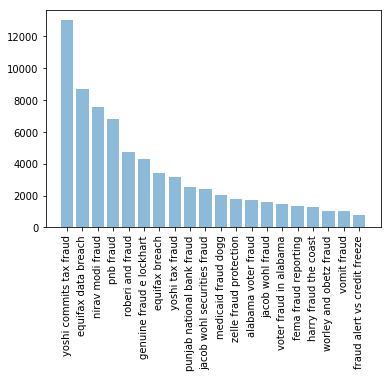

In [42]:
plt.bar(related_query_df['query'],related_query_df['value'],alpha=0.5, align="center")
plt.xticks(rotation=90)

In [43]:
# Display interest over time
overtime_interest = pytrends.interest_over_time()
overtime_interest.head(52)

,fraud,isPartial
date,,
2017-09-10,100,False
2017-09-17,84,False
2017-09-24,80,False
2017-10-01,72,False
2017-10-08,69,False
2017-10-15,74,False
2017-10-22,72,False
2017-10-29,69,False
2017-11-05,69,False


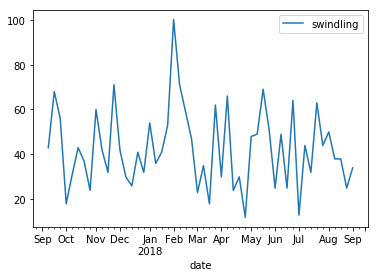

In [14]:
# Show trend line for given trend
lines  =  overtime_interest.plot.line()